In [482]:
import torch
import matplotlib.pyplot as plt


In [483]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [484]:
# x to y
# add 1 dimension in q 1
torch.manual_seed(0)
X=torch.arange(0, 100,0.2).unsqueeze(dim=1)
Y=0.5*X+2

In [485]:
trainSplit=int(len(X)*0.7)
Xtrain,Xtest=X[:trainSplit], X[trainSplit:]
Ytrain,Ytest=Y[:trainSplit], Y[trainSplit:]

In [486]:
def PlotLoss(epochs, Trloss, Teloss):
    plt.scatter(epochs, Trloss, c="b", s=4, label="Training Loss")
    plt.scatter(epochs, Teloss, c="g", s=4, label="Testing Loss")
    plt.legend(prop={"size": 1})
    
def PlotPred(Xtrain=Xtrain, Xtest=Xtest, Ytrain=Ytrain, Ytest=Ytest, predictions=None):
    # we need x and y
    plt.figure(figsize=(5, 5))

    plt.scatter(Xtrain, Ytrain, c="b", s=4, label="Training data")
    plt.scatter(Xtest, Ytest, c="g", s=4, label="Testing data")
    if predictions is not None:
        plt.scatter(Xtest, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14})


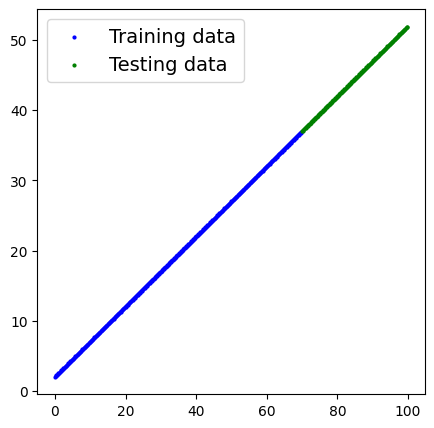

In [487]:
PlotPred(Xtrain,Xtest,Ytrain,Ytest)

In [488]:
class LRModel_ex(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # this does not make any sense
        self.linear=torch.nn.Linear(1,1)
    def forward(self, x:torch.Tensor)->torch.Tensor:
        return self.linear(x)

In [489]:
exerciseModel=LRModel_ex()
exerciseModel.state_dict()

OrderedDict([('linear.weight', tensor([[-0.0075]])),
             ('linear.bias', tensor([0.5364]))])

In [490]:
next(exerciseModel.parameters()).device

device(type='cpu')

In [491]:
exerciseModel.to(device)
next(exerciseModel.parameters()).device

device(type='cuda', index=0)

In [492]:
Xtrain = Xtrain.to(device)
Xtest = Xtest.to(device)
Ytrain = Ytrain.to(device)
Ytest = Ytest.to(device)

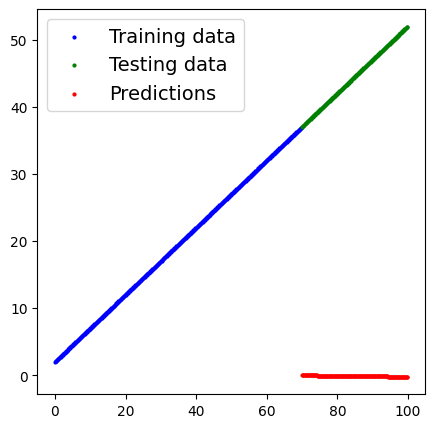

In [493]:
with torch.inference_mode():
    y_preds = exerciseModel(Xtest)
y_preds
PlotPred(predictions=y_preds.cpu())

In [494]:
lossFN=torch.nn.MSELoss()
optimizer = torch.optim.Adam(exerciseModel.parameters(), lr=1e-2)

In [495]:
def train(epochs=100):
    for epoch in range(epochs):
        exerciseModel.train()
        Ypred=exerciseModel(Xtrain)
        lossvalue=lossFN(Ypred,Ytrain)
        optimizer.zero_grad()
        lossvalue.backward()
        optimizer.step()

        exerciseModel.eval()
        with torch.inference_mode():
            ypredInference=exerciseModel(Xtest)
            testLoss=lossFN(ypredInference, Ytest)
            if epoch % 10==0:
                print(f"Epoch: {epoch} | Train loss: {lossvalue} | Test loss: {testLoss}")

In [496]:
train(1000)

Epoch: 0 | Train loss: 472.83721923828125 | Test loss: 1927.393798828125
Epoch: 10 | Train loss: 311.7261047363281 | Test loss: 1249.6473388671875
Epoch: 20 | Train loss: 188.81307983398438 | Test loss: 739.7822875976562
Epoch: 30 | Train loss: 103.48292541503906 | Test loss: 392.2782897949219
Epoch: 40 | Train loss: 50.383522033691406 | Test loss: 181.42855834960938
Epoch: 50 | Train loss: 21.281478881835938 | Test loss: 70.11781311035156
Epoch: 60 | Train loss: 7.560740947723389 | Test loss: 20.81211280822754
Epoch: 70 | Train loss: 2.1920416355133057 | Test loss: 3.7724802494049072
Epoch: 80 | Train loss: 0.5601403117179871 | Test loss: 0.10731817036867142
Epoch: 90 | Train loss: 0.23408500850200653 | Test loss: 0.32999807596206665
Epoch: 100 | Train loss: 0.2192029058933258 | Test loss: 0.9073212146759033
Epoch: 110 | Train loss: 0.22834567725658417 | Test loss: 1.0903258323669434
Epoch: 120 | Train loss: 0.22339890897274017 | Test loss: 1.0009289979934692
Epoch: 130 | Train loss: 

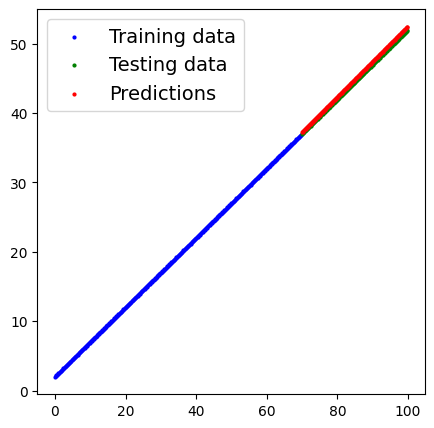

In [498]:
exerciseModel.eval()

with torch.inference_mode():
    y_preds = exerciseModel(Xtest)
y_preds
PlotPred(predictions=y_preds.cpu())